In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
data=pd.read_csv("credit_train.csv",na_values=[np.nan]) 
df = pd.DataFrame(data) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [ ]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [ ]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Eliminate rows which have only NaN values

In [ ]:
df.iloc[100000:,:]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df=df.iloc[0:100000,:]
df=df.iloc[:,2:]
df.drop('Months since last delinquent',axis='columns', inplace=True)

In [ ]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

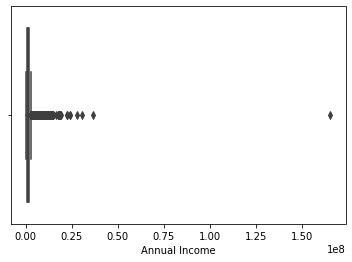

In [ ]:
sns.boxplot(x=df['Annual Income'])

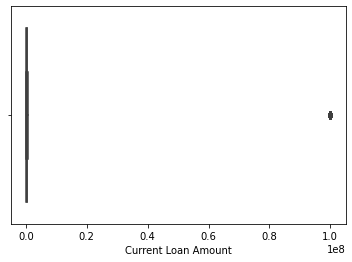

In [ ]:
sns.boxplot(x=df['Current Loan Amount'])

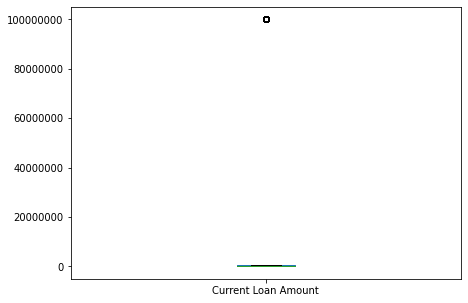

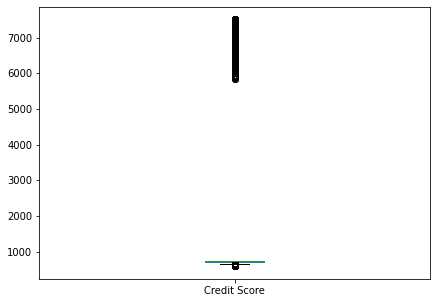

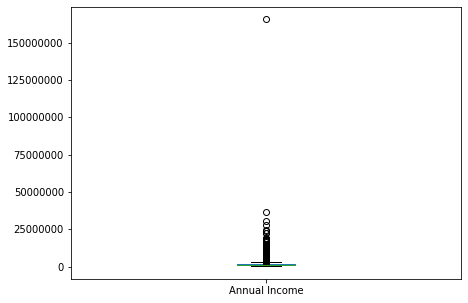

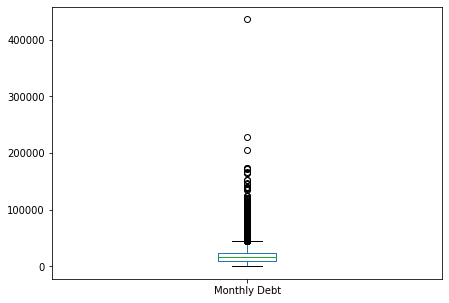

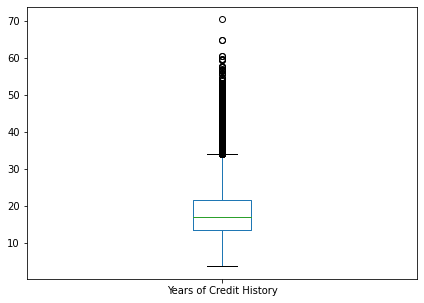

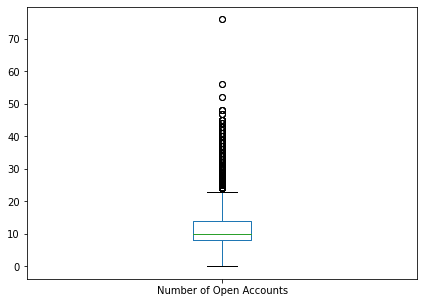

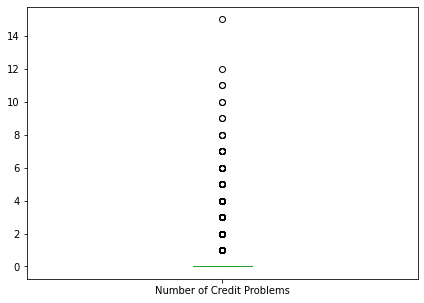

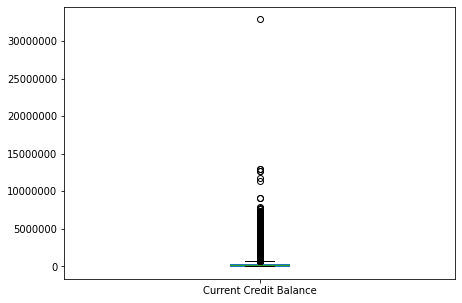

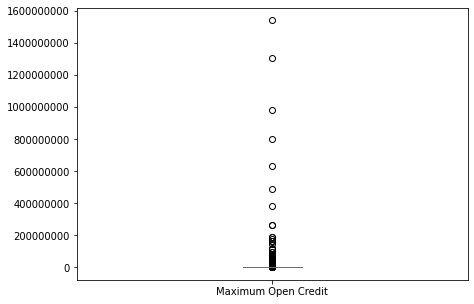

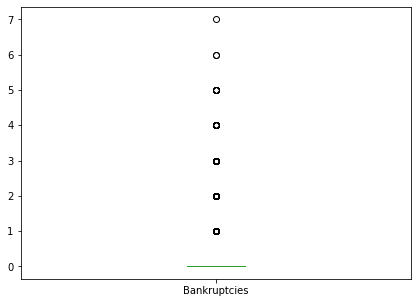

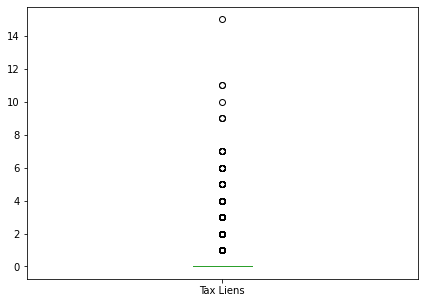

In [ ]:
columns=df.columns
cat=['Loan Status',
'Years in current job',
 'Home Ownership',
 'Purpose',
 'Term']
# for column in columns:

for column in columns:
    if column not in cat:
        plt.figure(figsize=(7,5))
        plt.ticklabel_format(style='plain')
        df.boxplot([column],grid=False,)

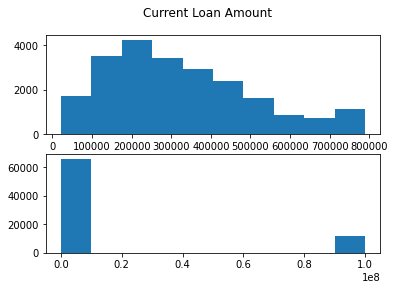

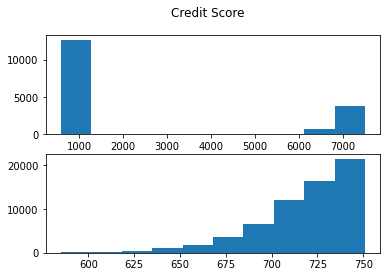

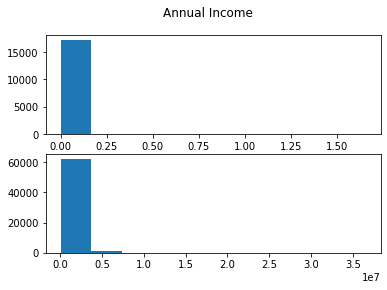

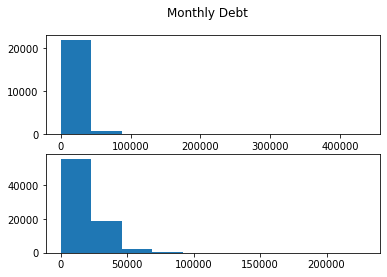

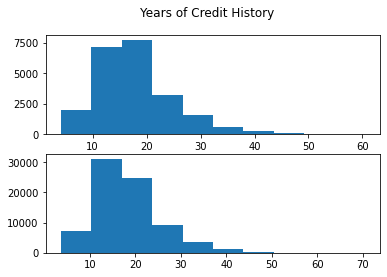

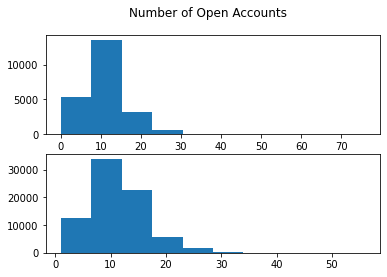

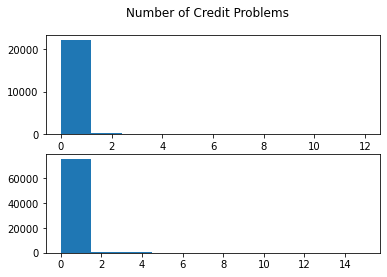

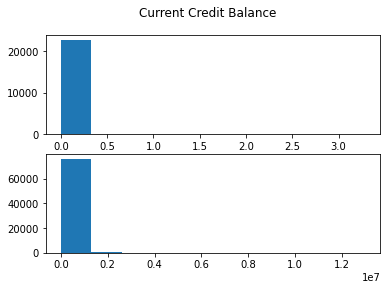

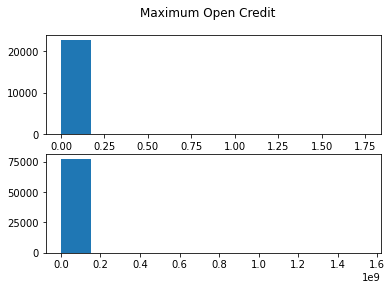

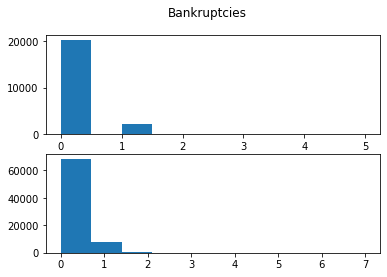

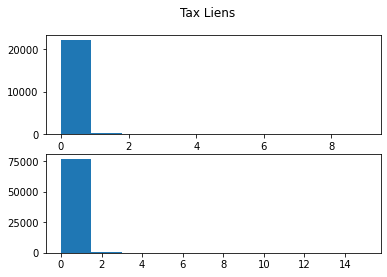

In [ ]:
for column in columns:
    if column not in cat:
        fig,ax=plt.subplots(2)

#         plt.figure(figsize=(7,5))
#         plt.ticklabel_format(style='plain')
#         df.boxplot([column],grid=False,)
#         plt.title(column)
        fig.suptitle(column)

        ax[0].hist(df[df["Loan Status"]=="Charged Off"][column])
        ax[1].hist(df[df["Loan Status"]=="Fully Paid"][column])

In [ ]:
# df.drop(index=df[df["Current Loan Amount"]>=800000].index,inplace=True)


In [ ]:
df.drop('Tax Liens',axis='columns', inplace=True)

In [ ]:
# df.drop(df[df['Current Loan Amount'] == 99999999.0].index, inplace = True)


In [ ]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0


In [ ]:
df.drop(index=df[df["Annual Income"]/10**5>=150].index,inplace=True)

df.describe()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


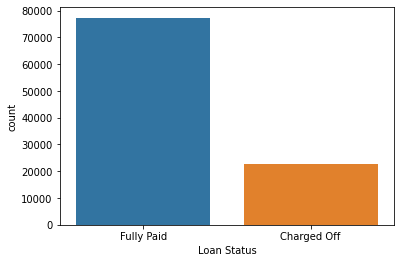

In [ ]:
sns.countplot(df['Loan Status'])

(array([88501.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 11480.]),
 array([1.08020000e+04, 5.01026185e+06, 1.00097217e+07, 1.50091815e+07,
        2.00086414e+07, 2.50081012e+07, 3.00075611e+07, 3.50070209e+07,
        4.00064808e+07, 4.50059406e+07, 5.00054005e+07, 5.50048603e+07,
        6.00043202e+07, 6.50037800e+07, 7.00032399e+07, 7.50026998e+07,
        8.00021596e+07, 8.50016194e+07, 9.00010793e+07, 9.50005391e+07,
        9.99999990e+07]),
 <a list of 20 Patch objects>)

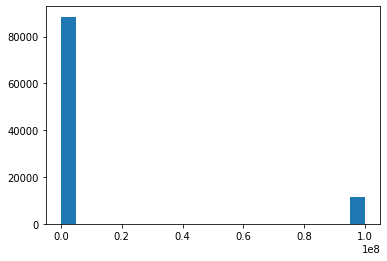

In [ ]:
plt.hist(df['Current Loan Amount'],bins=20,)

In [ ]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies'],
      dtype='object')

# Fill missing values with median

In [ ]:
df['Credit Score'].fillna(df['Credit Score'].median(), inplace=True)
df['Annual Income'].fillna(df['Annual Income'].median(), inplace=True)

df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].median(), inplace=True)
df['Bankruptcies'].fillna(df['Bankruptcies'].median(), inplace=True)
# df['Tax Liens'].fillna(df['Tax Liens'].median(), inplace=True)

In [ ]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0
1,Fully Paid,262328.0,Short Term,724.0,1173972.0,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0
4,Fully Paid,176220.0,Short Term,724.0,1173972.0,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99981 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                99981 non-null  object 
 1   Current Loan Amount        99981 non-null  float64
 2   Term                       99981 non-null  object 
 3   Credit Score               99981 non-null  float64
 4   Annual Income              99981 non-null  float64
 5   Years in current job       95759 non-null  object 
 6   Home Ownership             99981 non-null  object 
 7   Purpose                    99981 non-null  object 
 8   Monthly Debt               99981 non-null  float64
 9   Years of Credit History    99981 non-null  float64
 10  Number of Open Accounts    99981 non-null  float64
 11  Number of Credit Problems  99981 non-null  float64
 12  Current Credit Balance     99981 non-null  float64
 13  Maximum Open Credit        99981 non-null  flo

In [ ]:
df['Years in current job'].value_counts()

10+ years    31110
2 years       9133
3 years       8169
< 1 year      8163
5 years       6786
1 year        6459
4 years       6143
6 years       5685
7 years       5577
8 years       4580
9 years       3954
Name: Years in current job, dtype: int64

In [ ]:
df['Home Ownership'].value_counts()

Home Mortgage    48401
Rent             42188
Own Home          9178
HaveMortgage       214
Name: Home Ownership, dtype: int64

In [ ]:
df['Purpose'].value_counts()

Debt Consolidation      78540
other                    6034
Home Improvements        5837
Other                    3249
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    149
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: Purpose, dtype: int64

In [ ]:
df['Term'].value_counts()

Short Term    72194
Long Term     27787
Name: Term, dtype: int64

In [ ]:
df['Loan Status'].value_counts()

Fully Paid     77346
Charged Off    22635
Name: Loan Status, dtype: int64

# One hot encoding and label encoding

In [ ]:
df.Purpose.value_counts().sort_values(ascending=False)

Debt Consolidation      78540
other                    6034
Home Improvements        5837
Other                    3249
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    149
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: Purpose, dtype: int64

In [ ]:
df['Home Ownership'].value_counts().sort_values(ascending=False)

Home Mortgage    48401
Rent             42188
Own Home          9178
HaveMortgage       214
Name: Home Ownership, dtype: int64

In [ ]:
top10=[x for x in df.Purpose.value_counts().sort_values(ascending=False).head(10).index]

In [ ]:
top10

['Debt Consolidation',
 'other',
 'Home Improvements',
 'Other',
 'Business Loan',
 'Buy a Car',
 'Medical Bills',
 'Buy House',
 'Take a Trip',
 'major_purchase']

In [ ]:
for label in top10:
    df[label]=np.where(df.Purpose==label,1,0)

In [ ]:
# top3=[x for x in df['Home Ownership'].value_counts().sort_values(ascending=False).head(2).index]



# for label in top3:
#     df[label]=np.where(df['Home Ownership']==label,1,0)

In [ ]:
df=pd.get_dummies(df, columns = ['Term','Home Ownership'],drop_first=True)


In [ ]:
df.loc[df['Years in current job'] == '10+ years', 'Years in current job'] = 10
df.loc[df['Years in current job'] == '< 1 year', 'Years in current job'] = 0
df.loc[df['Years in current job'] == '1 year', 'Years in current job'] = 1
df.loc[df['Years in current job'] == '2 years', 'Years in current job'] = 2
df.loc[df['Years in current job'] == '3 years', 'Years in current job'] = 3

df.loc[df['Years in current job'] == '4 years', 'Years in current job'] = 4
df.loc[df['Years in current job'] == '5 years', 'Years in current job'] = 5
df.loc[df['Years in current job'] == '6 years', 'Years in current job'] = 6
df.loc[df['Years in current job'] == '7 years', 'Years in current job'] = 7
df.loc[df['Years in current job'] == '8 years', 'Years in current job'] = 8
df.loc[df['Years in current job'] == '9 years', 'Years in current job'] = 9




# df.loc[df['Years in current job'] == '< 1 year', 'Years in current job'] = 9
# df.loc[df['Years in current job'] == '1 year', 'Years in current job'] = 7
# df.loc[df['Years in current job'] == '2 years', 'Years in current job'] = 1
# df.loc[df['Years in current job'] == '3 years', 'Years in current job'] = 0

# df.loc[df['Years in current job'] == '4 years', 'Years in current job'] = 2
# df.loc[df['Years in current job'] == '5 years', 'Years in current job'] = 3
# df.loc[df['Years in current job'] == '6 years', 'Years in current job'] = 8
# df.loc[df['Years in current job'] == '7 years', 'Years in current job'] = 6
# df.loc[df['Years in current job'] == '8 years', 'Years in current job'] = 5
# df.loc[df['Years in current job'] == '9 years', 'Years in current job'] = 10
# df.loc[df['Years in current job'] == '10+ years', 'Years in current job'] = 4

# df.loc[df['Term'] == 'Short Term', 'Term'] = 0
# df.loc[df['Term'] == 'Long Term', 'Term'] = 1


In [ ]:
df['Years in current job'].value_counts()

10    31110
2      9133
3      8169
0      8163
5      6786
1      6459
4      6143
6      5685
7      5577
8      4580
9      3954
Name: Years in current job, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99981 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   99981 non-null  object 
 1   Current Loan Amount           99981 non-null  float64
 2   Credit Score                  99981 non-null  float64
 3   Annual Income                 99981 non-null  float64
 4   Years in current job          95759 non-null  object 
 5   Purpose                       99981 non-null  object 
 6   Monthly Debt                  99981 non-null  float64
 7   Years of Credit History       99981 non-null  float64
 8   Number of Open Accounts       99981 non-null  float64
 9   Number of Credit Problems     99981 non-null  float64
 10  Current Credit Balance        99981 non-null  float64
 11  Maximum Open Credit           99981 non-null  float64
 12  Bankruptcies                  99981 non-null  float64
 13  D

In [ ]:
df['Years in current job'].fillna(10, inplace=True)

In [ ]:
df.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Credit Score                    0
Annual Income                   0
Years in current job            0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Debt Consolidation              0
other                           0
Home Improvements               0
Other                           0
Business Loan                   0
Buy a Car                       0
Medical Bills                   0
Buy House                       0
Take a Trip                     0
major_purchase                  0
Term_Short Term                 0
Home Ownership_Home Mortgage    0
Home Ownership_Own Home         0
Home Ownership_Rent             0
dtype: int64

In [ ]:
df.loc[df['Loan Status'] == 'Charged Off', 'Loan Status'] = 0
df.loc[df['Loan Status'] == 'Fully Paid', 'Loan Status'] = 1


In [ ]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Credit Score', 'Annual Income',
       'Years in current job', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Debt Consolidation', 'other',
       'Home Improvements', 'Other', 'Business Loan', 'Buy a Car',
       'Medical Bills', 'Buy House', 'Take a Trip', 'major_purchase',
       'Term_Short Term', 'Home Ownership_Home Mortgage',
       'Home Ownership_Own Home', 'Home Ownership_Rent'],
      dtype='object')

In [ ]:
col=['Current Loan Amount', 'Credit Score', 'Annual Income',
       'Years in current job', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies',
       'Debt Consolidation', 'other', 'Home Improvements', 'Other',
       'Business Loan', 'Buy a Car', 'Medical Bills', 'Buy House',
       'Take a Trip', 'major_purchase', 'Term_Short Term',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent']

# Building the model

In [ ]:
from sklearn.model_selection import train_test_split

X=df[col] 
y=df['Loan Status'].astype('int')

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [ ]:
# from imblearn.combine import SMOTEENN
# smenn=SMOTEENN()
# X_train, y_train=smenn.fit_resample(X_train,y_train)

# **Neural Network Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU

In [ ]:
model=Sequential()
model.add(Dense(35,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics="accuracy")

In [ ]:
model.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
2500/2500 [==============================] - 13s 4ms/step - loss: 519.9578 - accuracy: 0.6902
Epoch 2/50
2500/2500 [==============================] - 10s 4ms/step - loss: 147.7569 - accuracy: 0.6859
Epoch 3/50
2500/2500 [==============================] - 10s 4ms/step - loss: 32.4009 - accuracy: 0.6940
Epoch 4/50
2500/2500 [==============================] - 10s 4ms/step - loss: 11.6696 - accuracy: 0.7059
Epoch 5/50
2500/2500 [==============================] - 9s 4ms/step - loss: 0.5148 - accuracy: 0.7732
Epoch 6/50
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5038 - accuracy: 0.7732
Epoch 7/50
2500/2500 [==============================] - 9s 4ms/step - loss: 0.5103 - accuracy: 0.7732
Epoch 8/50
2500/2500 [==============================] - 9s 4ms/step - loss: 0.5038 - accuracy: 0.7732
Epoch 9/50
2500/2500 [==============================] - 9s 4ms/step - loss: 0.5038 - accuracy: 0.7732
Epoch 10/50
2500/2500 [==============================] - 9s 4ms/step - 

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
for i in range(len(y_pred)):
  if y_pred[i]>0.5:
    y_pred[i]=1
  else:
    y_pred[i]=0

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision score:",metrics.precision_score(y_test, y_pred))
print("Recall score:",metrics.recall_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4498
           1       0.78      1.00      0.87     15499

    accuracy                           0.78     19997
   macro avg       0.39      0.50      0.44     19997
weighted avg       0.60      0.78      0.68     19997

Accuracy: 0.7750662599389908
Precision score: 0.7750662599389908
Recall score: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [5,7,9,11],
    'min_samples_leaf': [10,20,50],
    'min_samples_split': [10, 20,50],
    'n_estimators': [100, 200, 300, 400,500]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(max_depth= 11,
 min_samples_leaf= 50,
 min_samples_split= 50,
 n_estimators= 100)

clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision score:",metrics.precision_score(y_test, y_pred))
print("Recall score:",metrics.recall_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.20      0.34      4498
           1       0.81      1.00      0.90     15499

    accuracy                           0.82     19997
   macro avg       0.91      0.60      0.62     19997
weighted avg       0.85      0.82      0.77     19997

Accuracy: 0.8206731009651448
Precision score: 0.8121037463976946
Recall score: 1.0


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20,weights='distance')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.770665599839976


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision score:",metrics.precision_score(y_test, y_pred))
print("Recall score:",metrics.recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.04      0.08      4498
           1       0.78      0.98      0.87     15499

    accuracy                           0.77     19997
   macro avg       0.59      0.51      0.47     19997
weighted avg       0.70      0.77      0.69     19997

Accuracy: 0.770665599839976
Precision score: 0.7795481325887597
Recall score: 0.9817407574682238


# **Cataboost Classifier**

In [ ]:
from sklearn.model_selection import GridSearchCV

 
# defining parameter range
param_grid = {'max_depth': [3,4,5,10],'n_estimators':[100, 200, 300],'learning_rate':[.1,.01,.5,.2]}
 
grid = GridSearchCV(CatBoostClassifier(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 28 kB/s 


In [ ]:
from catboost import CatBoostClassifier

# train the model on train set
model = CatBoostClassifier(learning_rate =0.1, max_depth =10, n_estimators= 100)
model.fit(X_train, y_train)
 
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

0:	learn: 0.6243491	total: 60.1ms	remaining: 5.95s
1:	learn: 0.5773972	total: 119ms	remaining: 5.83s
2:	learn: 0.5472265	total: 177ms	remaining: 5.71s
3:	learn: 0.5245745	total: 196ms	remaining: 4.71s
4:	learn: 0.5065510	total: 230ms	remaining: 4.36s
5:	learn: 0.4918367	total: 293ms	remaining: 4.59s
6:	learn: 0.4829527	total: 321ms	remaining: 4.27s
7:	learn: 0.4691161	total: 382ms	remaining: 4.4s
8:	learn: 0.4614232	total: 443ms	remaining: 4.47s
9:	learn: 0.4561791	total: 504ms	remaining: 4.53s
10:	learn: 0.4513054	total: 566ms	remaining: 4.58s
11:	learn: 0.4449897	total: 634ms	remaining: 4.65s
12:	learn: 0.4411807	total: 692ms	remaining: 4.63s
13:	learn: 0.4387895	total: 758ms	remaining: 4.65s
14:	learn: 0.4362130	total: 827ms	remaining: 4.68s
15:	learn: 0.4341759	total: 887ms	remaining: 4.66s
16:	learn: 0.4323085	total: 966ms	remaining: 4.71s
17:	learn: 0.4288434	total: 1.03s	remaining: 4.68s
18:	learn: 0.4272869	total: 1.09s	remaining: 4.65s
19:	learn: 0.4257512	total: 1.15s	remaini

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision score:",metrics.precision_score(y_test, predictions))
print("Recall score:",metrics.recall_score(y_test, predictions))

Accuracy: 0.8218732809921488
Precision score: 0.814711310308463
Recall score: 0.9969030260016776


# **Logistic Regresion**

In [ ]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(classifier, param_grid = param_grid, cv=2,verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)
print('Best Score: ', best_clf.best_score_*100)
print('Best Params: ', best_clf.best_params_)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C= 0.0018329807108324356, max_iter = 1000, penalty = 'l2', solver= 'newton-cg')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision score:",metrics.precision_score(y_test, y_pred))
print("Recall score:",metrics.recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.20      0.34      4498
           1       0.81      1.00      0.90     15499

    accuracy                           0.82     19997
   macro avg       0.90      0.60      0.62     19997
weighted avg       0.85      0.82      0.77     19997

Accuracy: 0.8205730859628945
Precision score: 0.8120840538699365
Recall score: 0.9998709594167365


# **XGBoost**

In [ ]:
from xgboost import XGBClassifier
xgbr = XGBClassifier()


params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         n_iter=10, verbose=True, n_jobs=-1)
clf.fit(X_train, y_train)
print('Best Score: ', clf.best_score_*100)
print('Best Params: ', clf.best_params_)

In [ ]:
from xgboost import XGBClassifier
xgbr = XGBClassifier(subsample= 0.5, n_estimators=1000, max_depth= 10, learning_rate= 0.01, colsample_bytree= 0.6, colsample_bylevel=0.8999999999999999)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision score:",metrics.precision_score(y_test, y_pred))
print("Recall score:",metrics.recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.23      0.37      4498
           1       0.82      1.00      0.90     15499

    accuracy                           0.82     19997
   macro avg       0.88      0.61      0.63     19997
weighted avg       0.84      0.82      0.78     19997

Accuracy: 0.8228734310146522
Precision score: 0.8160384839033673
Recall score: 0.9959997419188334
